# Practica 1
## Regresión Lineal

### Regresion lineal con 1 variable

En esta primera parte de la practica aplicaremos el metodo de regresion lineal sobre los datos de un fichero para calcular, a traves del metodo del gradiente, la recta que mas se asemeja a los datos de entrenamiento.

## IMPORTS

In [1]:
import numpy as np
from pandas.io.parsers import read_csv 
import math as mt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
# Funcion que carga el fichero csv especificado y lo devuelve en un array de numpy
def carga_csv(file_name):
    valores = read_csv(file_name, header = None).values
    # suponemos que siempre trabajaremos con float     
    return valores.astype(float)

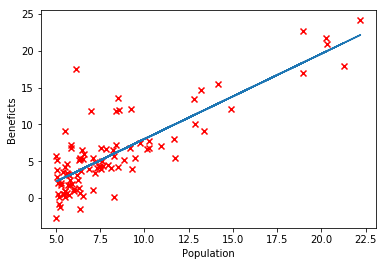

In [13]:
datos = carga_csv('ex1data1.csv')

#print(datos)

X = datos[:, :-1]
np.shape(X)         # (97, 1)     
Y = datos[:, -1]
np.shape(Y)         # (97,)
plt.scatter(X, Y, marker = 'x', c='r')

plt.xlabel('Population')
plt.ylabel('Beneficts')

m = np.shape(X)[0]
n = np.shape(X)[1]

# Añadimos una columna de 1's
X = np.hstack([np.ones([m, 1]), X])
Y = np.reshape(Y, (m, 1))

alpha = 0.01

def h(x, Theta):
    return np.dot(x, np.transpose(Theta))

def coste(X, Y, Theta):
    H = h(X, Theta)
    Aux = (H - Y) ** 2
    return (Aux.sum() / (2 * len(X)))

def descenso_gradiente(x, y, times):
    theta = np.zeros([1, n+1], dtype = float)
    c = np.zeros([times, 1], dtype = float)
    for i in range(times):
        H = h(x, theta)
        aux0 = theta[0][0] - alpha*np.sum((H-y))*(1/m)
        aux1 = theta[0][1] - alpha*np.sum((H-y)*x)*(1/m)
        theta[0][0] = aux0
        theta[0][1] = aux1
        c[i] = coste(x, y, theta)
    return [theta, c]

Theta = descenso_gradiente(X, Y, 1500)
#print(Theta[0])
#print(Theta[1])

plt.plot(X[:, 1:], h(X, Theta[0]))


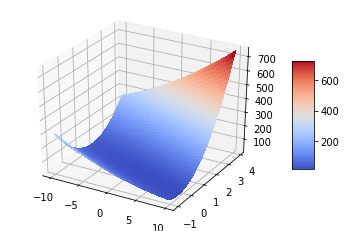

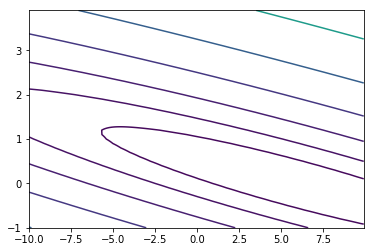

In [14]:
def make_data(t0_range, t1_range, X, Y):
    """Genera las matrices X,Y,Z para generar un plot en 3D
    """
    step = 0.1
    Theta0 = np.arange(t0_range[0], t0_range[1], step)
    Theta1 = np.arange(t1_range[0], t1_range[1], step)
    Theta0, Theta1 = np.meshgrid(Theta0, Theta1)
    # Theta0 y Theta1 tienen las misma dimensiones, de forma que
    # cogiendo un elemento de cada uno se generan las coordenadas x,y
    # de todos los puntos de la rejilla
    Coste = np.empty_like(Theta0)
    #print(Coste)
    for ix, iy in np.ndindex(Theta0.shape):
        Coste[ix, iy] = coste(X, Y, [Theta0[ix, iy], Theta1[ix, iy]])/100
    return [Theta0, Theta1, Coste]

# Funcion que dibuja los ejes
def figura(X, Y, Z):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    # Plot the surface
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    
    # Customize the Z axis
    #ax.set_zlim(-1.01, 1.01)
    #ax.zaxis.set_major_locator(LinearLocator(10))
    #ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    
    # Add a color bar which maps values to colors
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()
    
def costosidad(X, Y, Z):
    plt.figure()
    plt.contour(X, Y, Z, np.logspace(-2, 3, 20))
    plt.show()

X1, X2, X3 = make_data([-10, 10], [-1, 4], X, Y)
figura(X1, X2, X3)
costosidad(X1, X2, X3)


Evolucion del coste


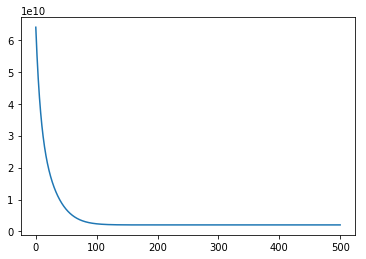

In [22]:
values = carga_csv('ex1data2.csv')
X = values[:, :-1]
Y = values[:, -1]
m = np.shape(X)[0]
n = np.shape(X)[1]

Y = np.reshape(Y, (m, 1))
X = np.hstack([np.ones([m, 1]), X])

def normalize(matrix):
    X_to_norm = np.empty(matrix.shape)
    mu = np.empty(n+1) #2 columnas para la media de cada atributo
    sigma = np.empty(n+1) #2 columnas para la desviación típica de cada atributo
    for i in range(n+1): #Recorremos ambas columnas
        mu[i] = np.mean(matrix[:, i])
        sigma[i] = np.std(matrix[:, i])
        if sigma[i] != 0:
            aux = (X[:, i] - mu[i])/sigma[i]
        else:
            aux = 1
        X_to_norm[:, i] = aux
    
    return X_to_norm, mu, sigma
        
a, b, c = normalize(X)
thSol, costSol = descenso_gradiente(a, Y, 1500)

def evolucion_coste(costeArr, times):
    plt.figure()
    x = np.linspace(0, 500, times, endpoint = True)
    x = np.reshape(x, (times, 1))
    plt.plot(x, costSol)
    
print("Evolucion del coste")
evolucion_coste(costSol, 1500)

Leemos el csv a tratar para la primera parte de la práctica:

Para el cálculo de h----> Htheta(x) = theta0 + x.theta1 def h(x, theta) el objetivo es encontrar el mínimo arbitrario avanzando los valores de theta theta[0,0]

Htheta(x) = theta^T(traspuesta) * x

[1x][0] [0]

Resumen de lo que hay que hacer: T = theta T0 = 0 T1 = 0 repeat 1500{ T0 = T0 + alpha1/m E desde i = 1 hasta m(hT(x^i) - y^i) T1 = T1 + alpha1/m E desde i = 1 hasta m(hT(x^i) - y^i)*X^(i) }

m = filas del csv

calculo de j es el coste. Nos dice si vamos bien, si el valor va disminuyendo
